In [12]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, prewitt
from skimage.feature import canny
from skimage.filters import threshold_otsu

mat_data = loadmat(r'data\Lab1\task3\clock.mat')
image = mat_data['clock']

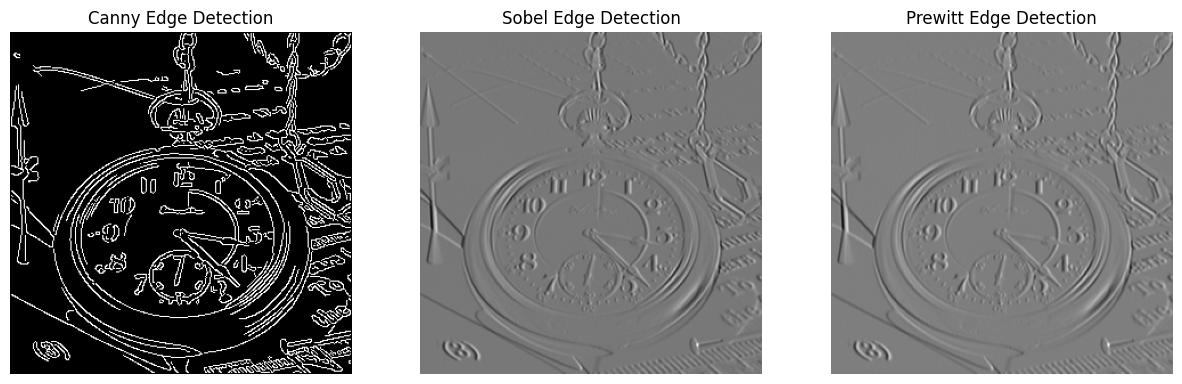

In [13]:

canny_edges = canny(image, sigma=1)  # sigma controls the Gaussian blur amount before edge detection

sobel_edges = sobel(image)

prewitt_edges = prewitt(image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.show()


In [ ]:
#So what are these three? 

#CANNY:
#Is a multi-stage edge detection that uses guassian filters to reduce noise, gradient calculations and edge tracking. 

#SOBEL:
#Uses horizontal and vertical kernels to detect edges. It highlights changes based on intensity changes. 

#Prewitt:
#Similar to SOBEL, but much simpler, and use less computational power. 

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\skimage\exposure\exposure.py:300: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


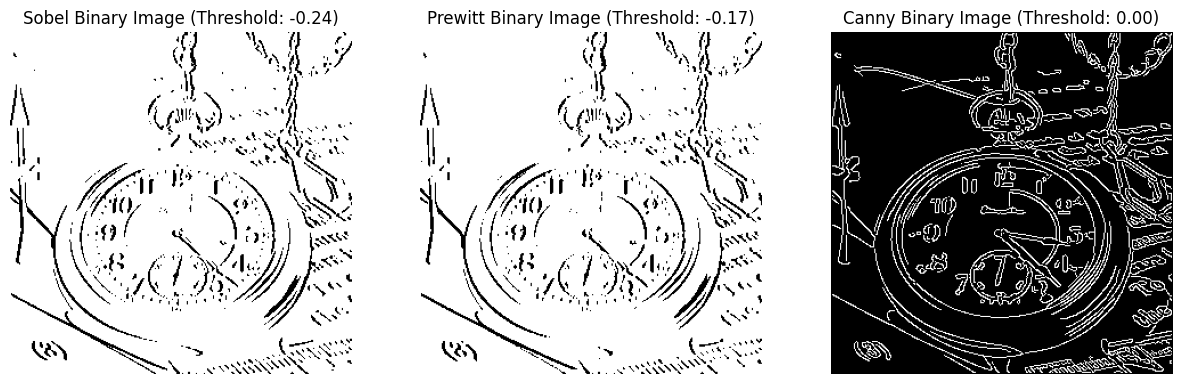

In [17]:
# Convert edge images to binary using Otsu's global thresholding
sobel_thresh = threshold_otsu(sobel_edges)
sobel_binary = sobel_edges > sobel_thresh

prewitt_thresh = threshold_otsu(prewitt_edges)
prewitt_binary = prewitt_edges > prewitt_thresh

canny_thresh = threshold_otsu(canny_edges)
canny_binary = canny_edges > canny_thresh 

# Display the binary images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
plt.imshow(canny_binary, cmap='gray')
plt.title(f'Canny Binary Image (Threshold: {canny_thresh:.2f})')
plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(sobel_binary, cmap='gray')
plt.title(f'Sobel Binary Image (Threshold: {sobel_thresh:.2f})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(prewitt_binary, cmap='gray')
plt.title(f'Prewitt Binary Image (Threshold: {prewitt_thresh:.2f})')
plt.axis('off')

plt.show()

In [18]:
# Otsu's global thresholding is a common way to convert images to binary by finding an optimal threshold value that minimize 
# the variance between the foreground and background.

#It becomes very clear that Canny produces the best results, and the other two are missing a few edges. Canny is generally a more 
# powerful method, which includes numerous stages. 